In [229]:
#importando as bibliotecas#
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

In [46]:
#leitura dos atributos comuns às duas bases#

with open('attributes.txt', 'r') as atributos:
    atributos.read()

dfa = pd.read_csv('attributes.txt')
dfa.rename(columns={'# Attributes for both netflix_titles.csv and amazon_prime_titles.csv datasets:': 'Atributos em comum para os datasets netflix_titles.csv e amazon_prime_titles.csv'}, inplace=True)
dfa

,Atributos em comum para os datasets netflix_titles.csv e amazon_prime_titles.csv
0,1 show_id - Unique ID for every Movie / Tv Show
1,2 type - Identifier - A Movie or TV Show
2,3 title - Title of the Movie / Tv Show
3,4 director - Director of the Movie
4,5 cast - Actors involved in the movie / show
5,6 country - Country where the movie / show was...
6,7 data_added - Date it was added on Netflix or...
7,8 release_year - Actual Release year of the mo...
8,9 rating - TV Rating of the movie / show
9,10 duration - Total Duration - in minutes or n...


In [214]:
#leitura das bases amazon e netflix#

dfamazon = pd.read_csv('amazon_prime_titles.csv')
dfamazon.insert(2, 'Empresa','Amazon')
dfnetflix = pd.read_csv('netflix_titles.csv')
dfnetflix.insert(2, 'Empresa','Netflix')

#conferencia do tipo de dados das fontes

'''dfamazon.dtypes
dfnetflix.dtypes'''

#concatenando as bases, definindo chave para identificação, renomeando os campos e estruturação#

geral = pd.concat([dfamazon, dfnetflix], ignore_index= True)

geral['id'] = geral['Empresa'] + geral['show_id']

geral.rename(columns={'show_id':'id_original','type': 'Tipo', 'title': 'Titulo', 'director': 'Diretor', 'cast': 'Elenco', 'country': 'País', 'date_added': 'Data_Adicao', 'release_year': 'Lançamento', 'rating': 'Classificacao', 'duration': 'Duracao', 'listed_in': 'Genero', 'description': 'Descricao'}, inplace= True)

geral['Data_Adicao'] = geral['Data_Adicao'].astype('datetime64')

Análise Exploratória

Tamanho do Dataset

In [215]:
geral.head(2)

,id_original,Tipo,Empresa,Titulo,Diretor,Elenco,País,Data_Adicao,Lançamento,Classificacao,Duracao,Genero,Descricao,id
0,s1,Movie,Amazon,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazons1
1,s2,Movie,Amazon,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazons2


In [186]:
geral.tail(2)

,id_original,Tipo,Empresa,Titulo,Diretor,Elenco,País,Data_Adicao,Lançamento,Classificacao,Duracao,Genero,Descricao,id
18473,s8806,Movie,Netflix,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflixs8806
18474,s8807,Movie,Netflix,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Netflixs8807


In [187]:
geral.shape

(18475, 14)

In [188]:
display(geral)

,id_original,Tipo,Empresa,Titulo,Diretor,Elenco,País,Data_Adicao,Lançamento,Classificacao,Duracao,Genero,Descricao,id
0,s1,Movie,Amazon,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazons1
1,s2,Movie,Amazon,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazons2
2,s3,Movie,Amazon,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazons3
3,s4,Movie,Amazon,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazons4
4,s5,Movie,Amazon,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazons5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18470,s8803,Movie,Netflix,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflixs8803
18471,s8804,TV Show,Netflix,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflixs8804
18472,s8805,Movie,Netflix,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflixs8805
18473,s8806,Movie,Netflix,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflixs8806


Descobrindo o período da análise

In [179]:
inicio = pd.to_datetime(geral['Data_Adicao']).dt.date
print(min(inicio))

2008-01-01


C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_7568\3646103312.py:2: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  print(min(inicio))


In [178]:
fim = pd.to_datetime(geral['Data_Adicao']).dt.date
print(max(inicio))

2021-10-10


C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_7568\3549609665.py:2: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  print(max(inicio))


Valores nulos e tipos de dados

In [189]:
geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18475 entries, 0 to 18474
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_original    18475 non-null  object        
 1   Tipo           18475 non-null  object        
 2   Empresa        18475 non-null  object        
 3   Titulo         18475 non-null  object        
 4   Diretor        13759 non-null  object        
 5   Elenco         16417 non-null  object        
 6   País           8648 non-null   object        
 7   Data_Adicao    8952 non-null   datetime64[ns]
 8   Lançamento     18475 non-null  int64         
 9   Classificacao  18134 non-null  object        
 10  Duracao        18472 non-null  object        
 11  Genero         18475 non-null  object        
 12  Descricao      18475 non-null  object        
 13  id             18475 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 2.0+ MB


Verificando o tipo dos dados

In [190]:
geral.dtypes

id_original              object
Tipo                     object
Empresa                  object
Titulo                   object
Diretor                  object
Elenco                   object
País                     object
Data_Adicao      datetime64[ns]
Lançamento                int64
Classificacao            object
Duracao                  object
Genero                   object
Descricao                object
id                       object
dtype: object

Verificando a existência de valores nulos

In [191]:
geral.isnull().sum()

id_original         0
Tipo                0
Empresa             0
Titulo              0
Diretor          4716
Elenco           2058
País             9827
Data_Adicao      9523
Lançamento          0
Classificacao     341
Duracao             3
Genero              0
Descricao           0
id                  0
dtype: int64

Analisando as informações estatísticas

In [194]:
geral.describe()

,Lançamento
count,18475.000000
mean,2011.124980
std,15.262484
min,1920.000000
25%,2011.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Filtrar os dados

1 - Top 10 atores/atrizes considerando todos os dados

In [220]:
geral_elenco = geral.assign(Elenco = geral['Elenco'].str.split(',')).explode('Elenco')
geral_elenco['Elenco'].value_counts().head(10)

Maggie Binkley       56
 Anupam Kher         55
 Nassar              43
Shah Rukh Khan       35
1                    35
 Paresh Rawal        35
 Om Puri             32
Gene Autry           32
 Prakash Raj         32
 Takahiro Sakurai    31
 Rupa Bhimani        31
Akshay Kumar         30
 Danny Trejo         30
Amitabh Bachchan     29
 Champion            29
 Michael Madsen      29
 Boman Irani         28
 Julie Tejwani       28
 Yuki Kaji           26
 Rajesh Kava         26
Name: Elenco, dtype: int64

<AxesSubplot:>

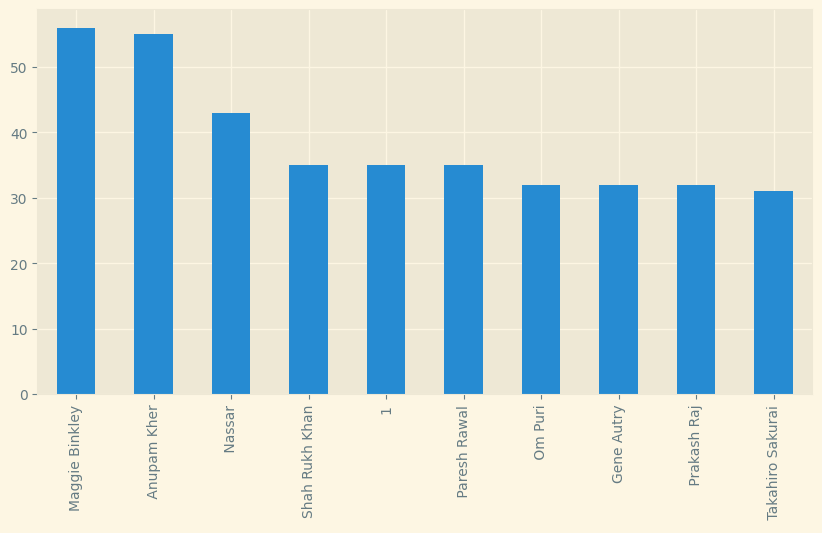

In [241]:
fig, ax_01 = plt.subplots(figsize=(10,5))
geral_elenco.Elenco.value_counts().head(10).plot(kind="bar", ax=ax_01)